# <span style="color:red">**exercise 2**</span>
![Python logo](./python_logo.gif)
---

In [511]:
# imports
import struct
import matplotlib.pyplot as plt
import struct
import numpy as np

## Q.1: Extracting values from a binary file
- The function __dump_array_file__ reads the binary file and
extracts the values using __struct.unpack__ .
It prints the extracted values in a readable format.

In [512]:
def dump_array_file(file_name:str)->None:
    """
    Reads a binary file containing an array of structures and extracts the values.

    Args:
        file_name (str): The path to the binary file.

    Returns:
        None

    Example:
        >>> dump_array_file("./f32_f32_i16.bin")
        file content:
        (1.0, 2.0, 3)
        (4.0, 5.0, 6)
    """
    with open(file_name, "rb") as file:
        bdata:bytes = file.read()
        
        re_1:tuple[float, float, int] = struct.unpack("ffh", bdata[:10])
        re_2:tuple[float, float, int] = struct.unpack("ffh", bdata[10:])

        print(f'file content:')
        print(re_1)
        print(re_2)

In [513]:
dump_array_file("./f32_f32_i16.bin")

file content:
(-0.5, 3.0, 5)
(5.0, 4.25, 45)


## Q.2: Displaying the image
- The function __show_img__ reads the binary file containing the image data.
- It unpacks the binary data into a list of floating-point numbers.
- Then, it converts the list into a NumPy array and reshapes it to the original image shape.
- Finally, it displays the image using Matplotlib.

In [514]:
def show_img(file_name:str)->None:
    """
    Reads a binary file containing image data and displays the image.

    Args:
        file_name (str): The path to the binary file.

    Returns:
        None

    Example:
        >>> show_img("./image.bin")
        [Image displayed]
    """
    # Open the binary file
    with open(file_name, "rb") as file:
        bdata:bytes = file.read()
        
        # Unpack the binary data into a list of integers
        img:list = []
        for i in range(0, len(bdata)//6):
            img += struct.unpack(">eee", bdata[i*6:(i*6)+6])

        # Convert the list to a numpy array and reshape it to the original image shape
        # Here, I'm assuming the image is square for simplicity.
        img_np:np.ndarray = np.array(img).reshape((int(len(img)**0.5), -1))

        # Display the image
        plt.imshow(img_np)
        plt.show()

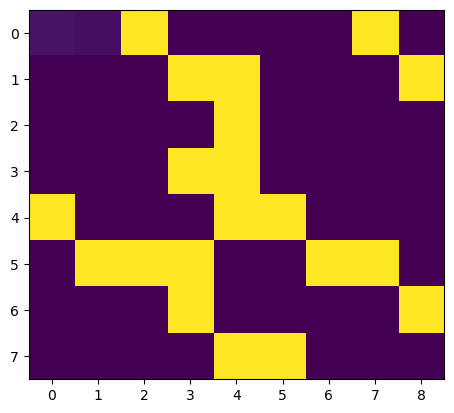

In [515]:
show_img("./image.bin")